# Standard PyTorch Workflow
This section is going to cover a standard PyTorch workflow.
The reference is https://www.learnpytorch.io/01_pytorch_workflow/.

## Major Steps
- Data
- Build model
- Train model
- Make prediction
- Save and load  PyTorch model 


### Data
We will use linear regression to create the data with known **parameter** and use PyTorch to see if we can build a model to esimate these parameters using **gradien descent**.

#### Split data into training and test sets
The dataset consists of 80% training data and 20% test data.

In [9]:
import torch

# create known parameters for a linear line function
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x.shape, y.shape, x[:5], y[:5]
print(x[:5], y[:5])

# split data into training and testing
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

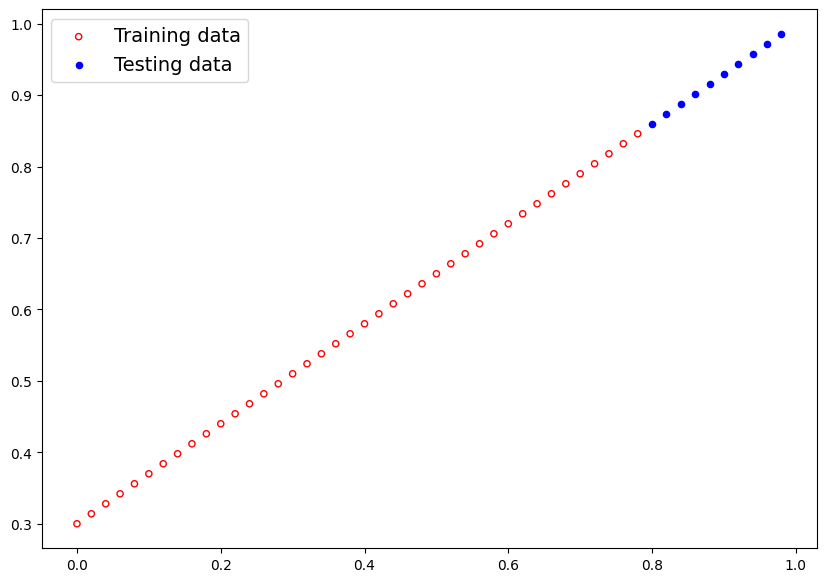

In [22]:
# plot data
import matplotlib.pyplot as plt

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))

    # plot training data
    plt.scatter(train_data, train_labels, edgecolors='r', marker='o', facecolors='none', s=20, label='Training data')

    # plot testing data
    plt.scatter(test_data, test_labels, c='b', s=20, label='Testing data')

    # add predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c='m', s=20, label='Predictions')

    # show the legend
    plt.legend(prop={'size': 14})

plot_predictions()

### Build model
Build a model to use the red hollow circles to predict the blue dots.

In [24]:
import torch.nn as nn

# create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Parameter is a Tensor subclass
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # forward method defines the computation performed at every call
    # this is going to override the forward method in the nn.Module class
    def forward(self, x) -> torch.Tensor:
        return self.weight * x + self.bias

In [28]:
## check the contents of the model
# set the random seed
torch.manual_seed(42)

# create the instance of the model
model = LinearRegressionModel()

# check the model parameters
print("Parameters: ", list(model.parameters()))

# get the state dictionary of the model
print("State of the model: ", model.state_dict())

Parameters:  [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
State of the model:  OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


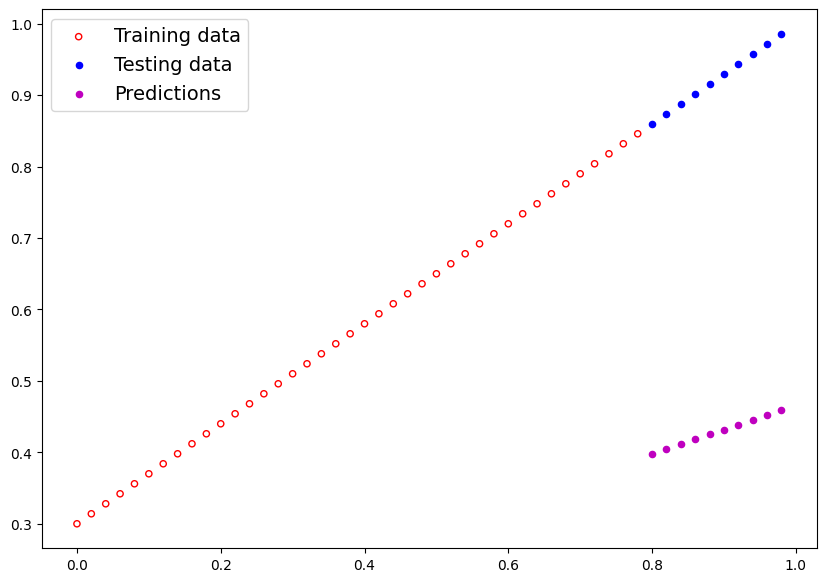

In [29]:
## make predictions with the model
with torch.inference_mode():
    y_pred = model(x_test)

# plot the predictions
plot_predictions(predictions=y_pred)

## Training
**Training Steps**
1. **Forward pass** - The model goes through all of the training data once, performing its `forward()` function calculations (`model(x_train)`).
2. **Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (`loss = loss_fn(y_pred, y_train`).
3. **Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).
4. **Perform backpropagation on the loss** - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with `requires_grad=True`). This is known as backpropagation, hence "backwards" (`loss.backward()`).
5. **Step the optimizer (gradient descent)** - Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them (`optimizer.step()`).

In [32]:
# create a linear regression model class
# this time we will use the build-in Linear layer which comes in handy
# than creating the weight and bias parameters manually.
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # use the nn.Linear() for the linear layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # forward method defines the computation performed at every call
    # this is going to override the forward method in the nn.Module class
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# create an instance of the model
# set the random seed to fix the random values
# this is optional
torch.manual_seed(42)

model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Epoch: 0, Training Loss: 0.5551779270172119, Testing Loss: 0.5739762783050537
Epoch: 10, Training Loss: 0.4399681091308594, Testing Loss: 0.4392664134502411
Epoch: 20, Training Loss: 0.3247582018375397, Testing Loss: 0.30455657839775085
Epoch: 30, Training Loss: 0.20954833924770355, Testing Loss: 0.16984672844409943
Epoch: 40, Training Loss: 0.09433844685554504, Testing Loss: 0.03513688966631889
Epoch: 50, Training Loss: 0.023886388167738914, Testing Loss: 0.04784907028079033
Epoch: 60, Training Loss: 0.019956793636083603, Testing Loss: 0.04580312967300415
Epoch: 70, Training Loss: 0.016517985612154007, Testing Loss: 0.037530578672885895
Epoch: 80, Training Loss: 0.013089167885482311, Testing Loss: 0.02994491532444954
Epoch: 90, Training Loss: 0.009653175249695778, Testing Loss: 0.02167237363755703
Epoch: 100, Training Loss: 0.006215682718902826, Testing Loss: 0.014086711220443249
Epoch: 110, Training Loss: 0.002787243574857712, Testing Loss: 0.005814170930534601
Epoch: 120, Training L

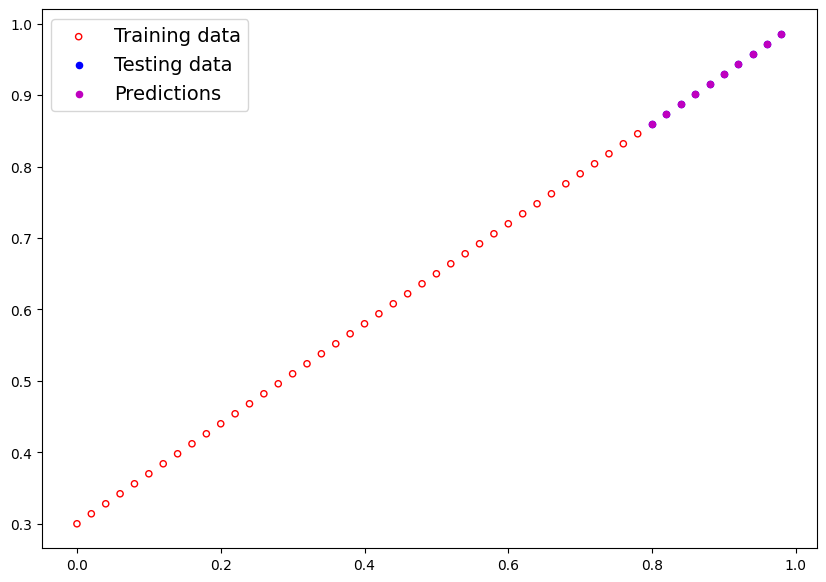

In [43]:
# set the random seed
torch.manual_seed(42)

# create the instance of the model
model = LinearRegressionModel()

# create loss function
loss_fnc = nn.L1Loss()

# create optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# set the number of epochs
epochs = 500

# detect the available device
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

# put the data on available device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

# put the model on available device
model.to(device)

# create a for-loop to train the model
for epoch in range(epochs):
    ### training

    # put the model in training mode]
    model.train()

    # 1. forward pass on training data
    y_pred = model(x_train)

    # 2. calculate the loss
    loss = loss_fnc(y_pred, y_train)

    # 3. zero the gradients
    optimizer.zero_grad()

    # 4. perform backwardpropagation
    loss.backward()

    # 5. progress the optimizer
    optimizer.step()


    ### testing
    # put the model in evaluation mode
    model.eval()

    # inference the model on testing data
    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = loss_fnc(test_pred, y_test)

        # print the loss
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}, Training Loss: {loss.item()}, Testing Loss: {test_loss.item()}")

# print the final parameters
print("Final parameters: ", model.state_dict())

# plot the predictions
plot_predictions(predictions=test_pred.cpu().detach())

## [Saving and Loading Models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models)
Saving models for later inference and sharing them with others.

Handy methods
- torch.save(model, PATH)
- torch.load(PATH)
- torch.nn.Module.load_state_dict()

In [ ]:
## Save the model
from pathlib import Path

path_model = Path("LinearRegressionModel.pth")
torch.save(model.state_dict(), path_model)

## Load the model
# create an instance of the model
model_loaded = LinearRegressionModel()
model_deserialized = torch.load(path_model, weights_only=True)
print("Deserialized model: ", model_deserialized)
# print("Current device:", next(model_deserialized).device)
model_loaded.load_state_dict(model_deserialized)
model_loaded.to(device) ## put the model on the device
next(model_loaded.parameters()).device

Deserialized model:  OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')), ('linear_layer.bias', tensor([0.3025], device='mps:0'))])


device(type='mps', index=0)